In [7]:
import pandas as pd
import pyreadstat

##### Задание 1
###### импортировать данные из файла в формате Excel в файл SPSS ( см. [1, стр. 27-29]);


In [ ]:
data = pd.read_excel('2.1.2.Данные для д.з. №1.xls', sheet_name='Вариант 6')
data = data.iloc[:25]
data.set_index('№ наблюдения', inplace=True)

pyreadstat.write_sav(data, 'spss_data.sav')

data

,Y,X1,X2,X3,X4,X5,X6
№ наблюдения,,,,,,,
1,32900.0,864.0,16144.0,39.5,4.90,3.2,36354.0
2,203456.0,8212.0,336472.0,46.4,60.50,20.4,23486.0
3,41138.0,1866.0,39208.0,43.7,24.90,9.5,20866.0
4,57342.0,1147.0,63273.0,35.7,50.40,34.7,47318.0
5,27294.0,1514.0,31271.0,41.8,5.10,17.9,17230.0
6,94552.0,4970.0,86129.0,49.8,35.90,12.1,19025.0
7,28507.0,1561.0,48461.0,44.1,48.10,18.9,18262.0
8,97788.0,4197.0,138657.0,48.1,69.50,12.2,23360.0
9,101734.0,6696.0,127570.0,47.6,31.90,8.1,15223.0


##### Задание 2
###### построить матрицу парной корреляции всех переменных и, проанализировав ее, сделать выводы относительно связи зависимой переменной от факторов и о связи между факторами (см. [1, стр. 29-31]);


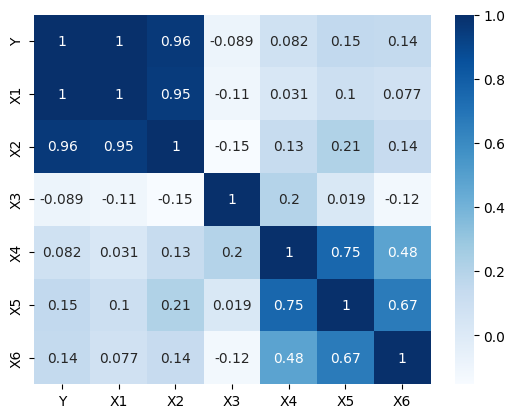

In [20]:
import matplotlib.pyplot as plt
import seaborn as sb

corr_matrix = data.corr()
corr = data.corr()
sb.heatmap(corr, cmap="Blues", annot=True)
plt.show()

#### Анализ корреляций
##### Связь зависимой переменной (Y) с факторами:
###### X1: Корреляция 0.995582 — очень высокая положительная корреляция. Это означает, что увеличение X1 связано с увеличением Y.
###### X2: Корреляция 0.955902 — также высокая положительная корреляция. X2 также сильно влияет на Y.
###### X3: Корреляция -0.088921 — практически отсутствует связь. Изменения в X3 не влияют на Y.
###### X4: Корреляция 0.081998 — также очень слабая положительная связь. Влияние X4 на Y незначительно.
###### X5: Корреляция 0.150202 — слабая положительная связь. X5 имеет небольшое влияние на Y.
###### X6: Корреляция 0.140464 — также слабая положительная связь. Влияние X6 на Y незначительно.
##### Связь между факторами:
###### X1 и X2: Корреляция 0.948797 — высокая положительная связь. Это может указывать на то, что X1 и X2 могут быть взаимозависимыми.
###### X1 и X3: Корреляция -0.106323 — слабая отрицательная связь.
###### X4 и X5: Корреляция 0.754343 — высокая положительная связь. Это может указывать на сильную взаимосвязь между этими переменными.
###### X5 и X6: Корреляция 0.667417 — также высокая положительная связь.
#### Выводы
##### Влияние на зависимую переменную (Y):
###### X1 и X2 являются наиболее значимыми факторами, влияющими на Y, с очень высокой положительной корреляцией. Это может указывать на то, что эти переменные являются важными предикторами для Y.
###### X3, X4, X5 и X6 имеют слабое влияние на Y, что может означать, что они не являются значительными предикторами.
##### Взаимосвязь между факторами:
###### Существует высокая корреляция между X1 и X2, а также между X4 и X5, что может указывать на возможную мультиколлинеарность. Это может быть важным фактором при построении регрессионной модели, так как мультиколлинеарность может влиять на стабильность оценок коэффициентов.

##### Задание 3
###### используя метод исключения, построить уравнение линейной множественной регрессии (см. [1, стр. 32-39]);

In [33]:
import statsmodels.api as sm
X = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']]
y = data['Y']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     940.6
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           1.82e-21
Time:                        20:47:34   Log-Likelihood:                -279.17
No. Observations:                  25   AIC:                             572.3
Df Residuals:                      18   BIC:                             580.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.459e+04   2.42e+04     -3.491      0.0

#### Анализ результатов
##### Оставляем:
###### X1: Значимо влияет на Y (p < 0.01).
###### X6: Значимо влияет на Y (p < 0.01).
##### Исключаем:
###### X2: Хотя p-значение 0.073 близко к значимому, оно все еще выше 0.05, поэтому можно рассмотреть его исключение, если вы хотите строго следовать критерию значимости.
###### X3: p-значение 0.093, незначимо.
###### X4: p-значение 0.357, незначимо.
###### X5: p-значение 0.439, незначимо.
##### Окончательная модель
###### На основании вышеизложенного, окончательная модель линейной регрессии будет включать только X1 и X6. Уравнение линейной регрессии будет выглядеть следующим образом:
###### Y  = B0 + B1*X1 + B2*X6, где B0 - свободеный член, а B1 и B2 - коэффициенты при X1 и Х6.

In [32]:
X_final = data[['X1', 'X6']]
X_final = sm.add_constant(X_final)
final_model = sm.OLS(y, X_final).fit()

print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2322.
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           2.56e-26
Time:                        20:47:22   Log-Likelihood:                -284.10
No. Observations:                  25   AIC:                             574.2
Df Residuals:                      22   BIC:                             577.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.758e+04   1.17e+04     -4.065      0.0

##### Задание 4
###### оценить качество модели с помощью коэффициента детерминации и провести проверку значимости на основе критерия Фишера 

##### Коэффициент детерминации (R²)
###### R-squared: 0.995
###### Это значение говорит о том, что 99.5% вариации зависимой переменной (Y) объясняется независимыми переменными (X1 и X6). Это очень высокий показатель, что указывает на то, что модель хорошо подходит к данным.
#####  Проверка значимости модели на основе критерия Фишера
###### F-statistic: 2322
###### Prob (F-statistic): 2.56e-26
###### Критерий Фишера (F-тест) используется для проверки значимости всей модели. В данном случае:
###### p-значение для F-статистики (Prob (F-statistic)) равно 2.56e-26, что значительно меньше 0.05.


##### Качество модели:
###### Высокий коэффициент детерминации (R² = 0.995) указывает на то, что модель объясняет почти всю вариацию зависимой переменной. Это говорит о том, что модель хорошо подходит к данным.
##### Значимость модели:
###### Поскольку p-значение для F-статистики (2.56e-26) значительно меньше 0.05, мы можем отвергнуть нулевую гипотезу. Это означает, что хотя бы одна из независимых переменных (в данном случае X1 или X6) значимо влияет на зависимую переменную Y.
